In [55]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('netflix_data.csv')
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
import pandas as pd

# Loading Netflix data
netflix_data = pd.read_csv('netflix_data.csv')

# Displaying basic information 
print("Dataset Shape:", netflix_data.shape)
print("\nColumn Names:\n", netflix_data.columns)
print("\nData Types:\n", netflix_data.dtypes)
print("\nFirst few rows of the dataset:\n", netflix_data.head())

Dataset Shape: (8807, 12)

Column Names:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

First few rows of the dataset:
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0

In [3]:
# Check for missing values
print("Missing Values:\n", netflix_data.isnull().sum())

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
# Converting release_year column to numeric
netflix_data['release_year'] = pd.to_numeric(netflix_data['release_year'], errors='coerce')

# Converting duration column to numeric
netflix_data['duration'] = pd.to_numeric(netflix_data['duration'].str.replace(' min', ''), errors='coerce')

# Droping rows with missing values in 'release_year' or 'duration' columns
netflix_data.dropna(subset=['release_year', 'duration'], inplace=True)

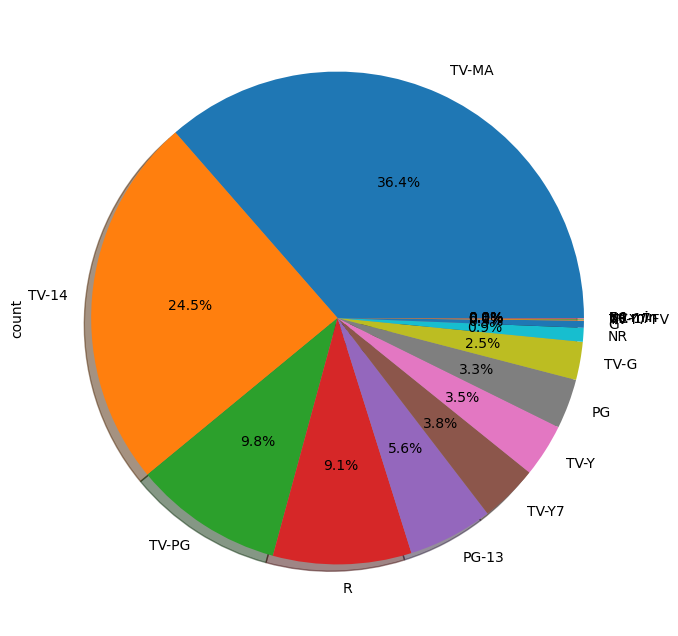

In [53]:
#Exploratory Analysis 

#Pie Chart to show the ratings of the netflix data 
import matplotlib.pyplot as plt

netflix_data['rating'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(10, 8))
plt.show()

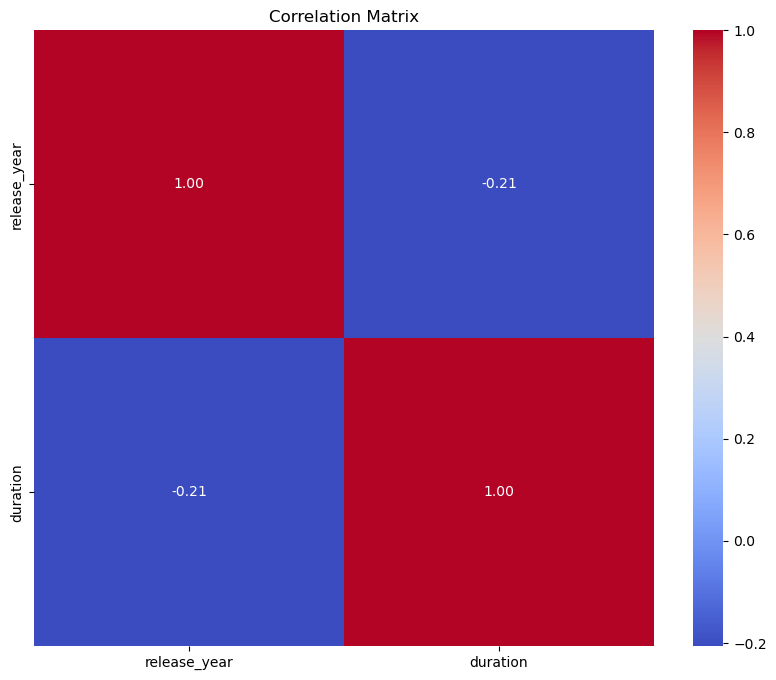

In [6]:
#Correlation matrix

# Selecting numeric columns
numeric_cols = netflix_data.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr_matrix = netflix_data[numeric_cols].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

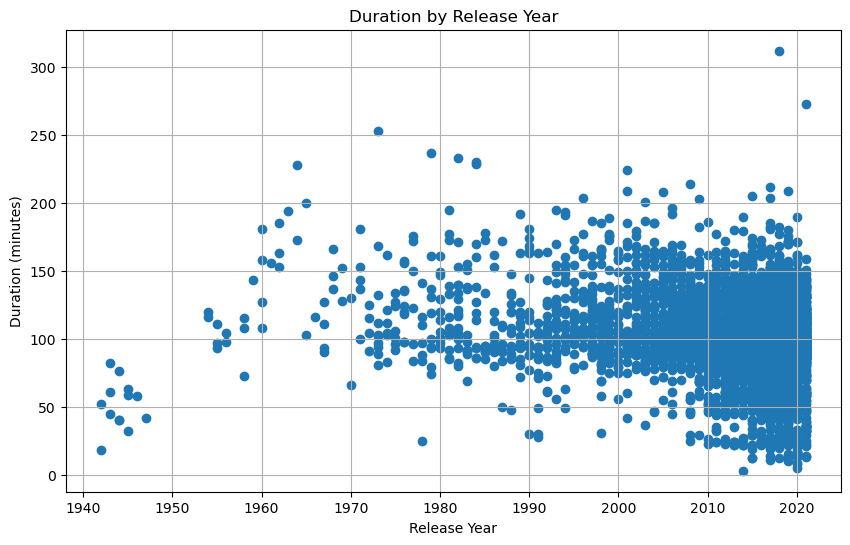

In [7]:
# Scatter plot of release year vs duration
plt.figure(figsize=(10, 6))
plt.scatter(netflix_data['release_year'], netflix_data['duration'])
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Duration by Release Year')
plt.grid(True)
plt.show()

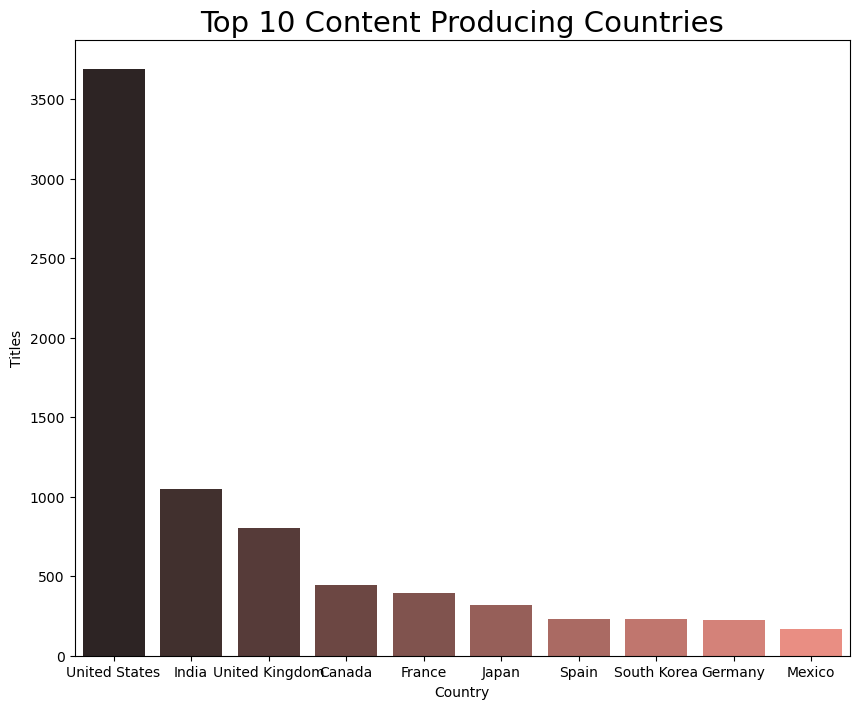

In [52]:
#Histogram for top 10 producing countries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

netflix_data = pd.read_csv('netflix_data.csv')

Countries = netflix_data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
Countries = Countries[Countries != 'production country unavailable']
plt.figure(figsize=(10, 8))
g = sns.countplot(x=Countries, order=Countries.value_counts().index[:10], palette='dark:salmon')
plt.title('Top 10 Content Producing Countries', fontsize=21)
plt.xlabel('Country')
plt.ylabel('Titles')
plt.show()


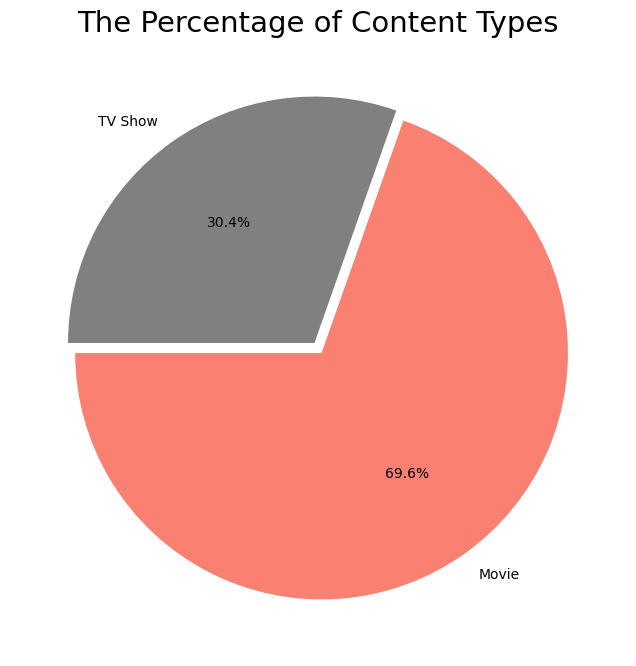

In [54]:
#Pir Chart for percentage of Movies amd TV Shows

plt.figure(figsize=(12, 8))
plt.title("The Percentage of Content Types", fontsize=21)
g = plt.pie(netflix_data['type'].value_counts(), explode=(0.025, 0.025), labels=netflix_data['type'].value_counts().index, colors=['salmon', 'grey'], autopct='%1.1f%%', startangle=180)
plt.show()